<a href="https://colab.research.google.com/github/pgpanagiotidis/Africa-Economic-Banking-and-Systemic-Crisis/blob/main/Africa_Economic_Banking_Systemic_Crisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Generic imports we will need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.lines import Line2D    
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [4]:
df = pd.read_csv ('african_crises.csv')

In [5]:
print(df.columns)

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')


In [6]:
#convert categorical variables to numeric
df['banking_crisis']=df['banking_crisis'].replace(['crisis','no_crisis'],[1,0])

In [7]:
# make time series the dataset
df = df.set_index('year')

Feature: 0, Score: 0.61270
Feature: 1, Score: 0.13559
Feature: 2, Score: 0.01635
Feature: 3, Score: 0.02331
Feature: 4, Score: 0.00393
Feature: 5, Score: 0.17081
Feature: 6, Score: 0.00569
Feature: 7, Score: 0.01464
Feature: 8, Score: 0.01698


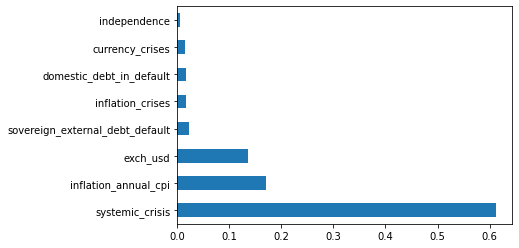

In [8]:
# random forest for feature importance for banking crisis feature
# define dataset
dfnew=df[['systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis']]
X, y = dfnew[['systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises']],dfnew['banking_crisis']
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(8)
   .plot(kind='barh'))
#systemic_crisis, inflation_annual_cpi and exch_usd are the most crucial feature for the prediction of the banking crisis

In [9]:
#Convert the data in the appropriate format
def Crisispercountry(data):
  country_total_crises=[]
  for i in data['country'].unique():
        dfcountry=data[data['country']==i]
        bank_crisis=dfcountry.groupby(['banking_crisis']).size()
        systemic_crisis=dfcountry.groupby(['systemic_crisis']).size()
        bank_crisis_list=bank_crisis.tolist()
        systemic_crisis_list=systemic_crisis.tolist()
        if len(bank_crisis_list)==1:
            country_total_crises.append([i,0,systemic_crisis_list[1]])
        elif len(systemic_crisis_list)==1:
            country_total_crises.append([i,bank_crisis_list[1],0])
        elif len(bank_crisis_list)==1 and len(systemic_crisis_list)==1:
            country_total_crises.append([i,0,0])
        else:
            country_total_crises.append([i,bank_crisis_list[1],systemic_crisis_list[1]])
  return country_total_crises


In [10]:
#Assign the data to a variable
datacrisis=Crisispercountry(df)

In [11]:
# Create the pandas DataFrame
dfcrisis = pd.DataFrame(datacrisis, columns = ['coutry', 'bank_crisis','systemic_crisis'])

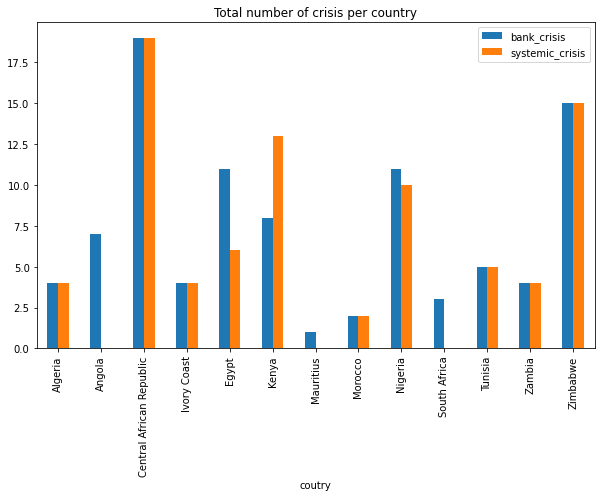

In [12]:
# Create the dataframe in the appropriate format for visualization
dfcrisesnew = pd.DataFrame({'bank_crisis': dfcrisis['bank_crisis'].tolist(),
                   'systemic_crisis': dfcrisis['systemic_crisis'].tolist()}, index=dfcrisis['coutry'])
plt.rcParams['figure.figsize'] = [10,6]
ax = dfcrisesnew.plot.bar()
ax.title.set_text('Total number of crisis per country')
ax.legend(fontsize = 10)
plt.show()

In [13]:
#Inflation annual CPI, the exchange rate of the country vis-a-vis the USD, the systemic crisis and the bank crisis for every country, and a line for the day that the independence happened
def Countryplot(data):
  for i in data['country'].unique():
    dfcountry=data[data['country']==i]
    xsind=dfcountry[dfcountry['independence']==1]
    xsnewind=xsind.index
    fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(16,1))
    dfcountry['inflation_annual_cpi'].plot(ax=axes[0])
    # axes[0].title.set_text('Inflation annual CPI')
    axes[0].axvline(xsnewind[0], label='Independence',color='k',linestyle='--')
    axes[0].legend(loc='upper center', bbox_to_anchor=(0.42, 1.85),
          ncol=1, fancybox=True, shadow=True)
    dfcountry['exch_usd'].plot(ax=axes[1])
    # axes[1].title.set_text('The exchange rate vis-a-vis the USD')
    axes[1].axvline(xsnewind[0], label='Independence',color='k',linestyle='--')
    axes[1].legend(loc='upper center', bbox_to_anchor=(0.42, 1.85),
          ncol=1, fancybox=True, shadow=True)
    dfcountry['systemic_crisis'].plot(ax=axes[2])
    # axes[2].title.set_text('Systemic crisis')
    axes[2].axvline(xsnewind[0], label='Independence',color='k',linestyle='--')
    axes[2].legend(loc='upper center', bbox_to_anchor=(0.42, 1.85),
          ncol=1, fancybox=True, shadow=True)
    dfcountry['banking_crisis'].plot(ax=axes[3])
    # axes[3].title.set_text('Banking crisis')
    axes[3].axvline(xsnewind[0], label='Independence',color='k',linestyle='--')
    axes[3].legend(loc='upper center', bbox_to_anchor=(0.42, 1.85),
          ncol=1, fancybox=True, shadow=True)
    plt.figtext(0.5, 1.7, i, ha='center', va='center',fontweight='bold')
    plt.show()

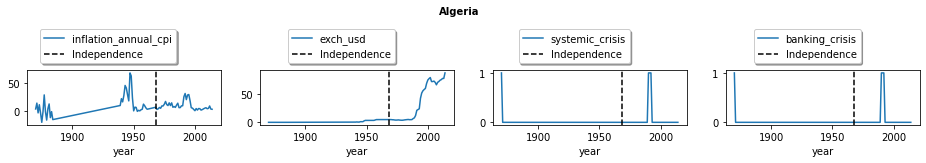

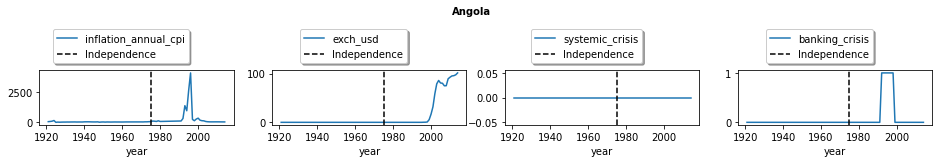

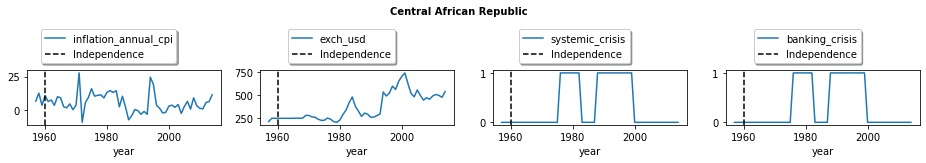

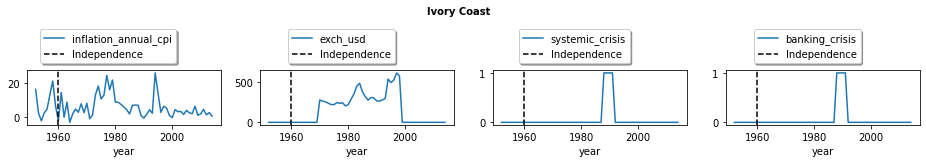

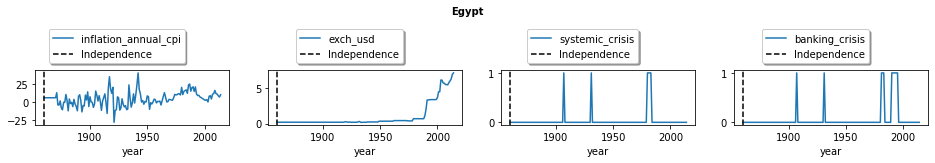

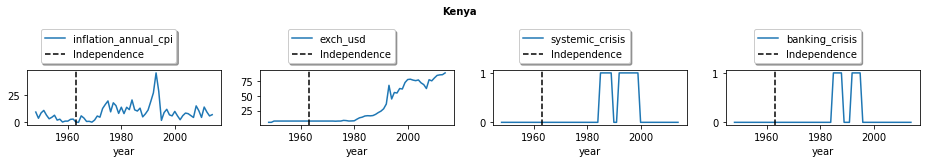

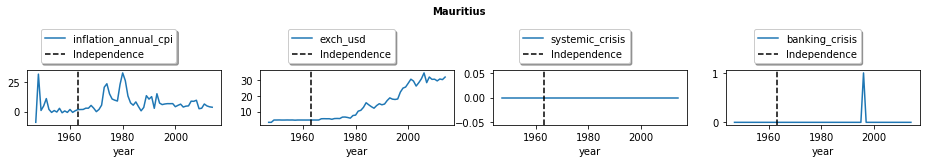

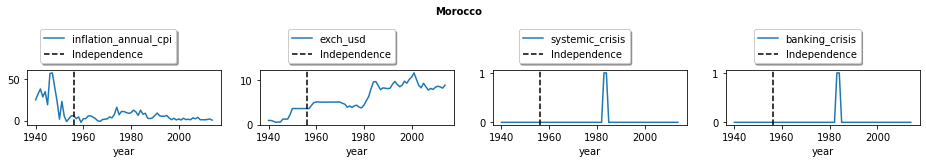

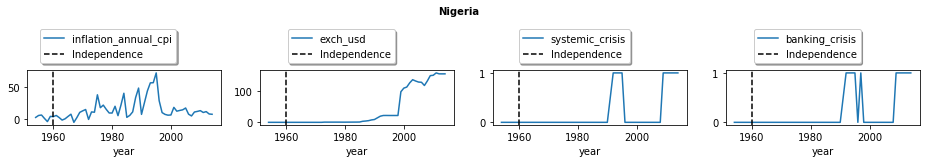

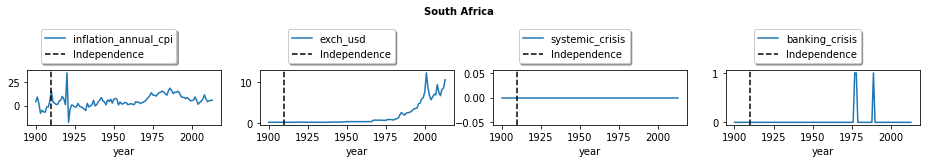

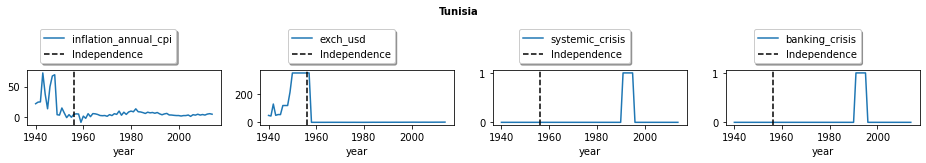

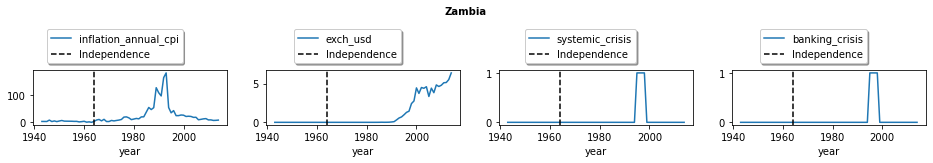

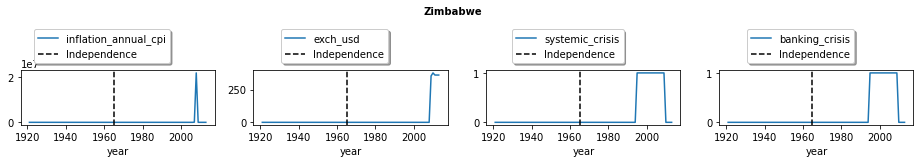

In [14]:
# Inflation annual CPI, the exchange rate of the country vis-a-vis the USD, the systemic crisis and the bank crisis for every country, and a line for the day that the independence happened
Countryplot(df)

In [15]:
#Inflation annual CPI, the exchange rate of the country vis-a-vis the USD and the banking crisis all in one plot for every country
def Countryplotall(data):
  for i in data['country'].unique():
    dfcountry=data[data['country']==i]
    plt.plot(dfcountry['inflation_annual_cpi'])
    plt.plot(dfcountry['exch_usd'])
    xs=dfcountry[dfcountry['banking_crisis']==1]
    xsnew=xs.index
    plt.vlines(x = xsnew, ymin =min(min(dfcountry['exch_usd']), min(dfcountry['inflation_annual_cpi'])), ymax =max(max(dfcountry['exch_usd']), max(dfcountry['inflation_annual_cpi'])),
           colors = 'red',ls='--')
    plt.legend(['Inflation annual CPI', 'The exchange rate vis-a-vis the USD','Banking crisis'])
    plt.xlabel('Year')
    plt.title(i)
    plt.show()
    


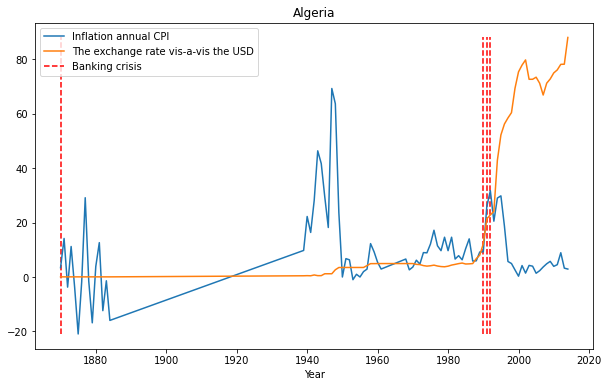

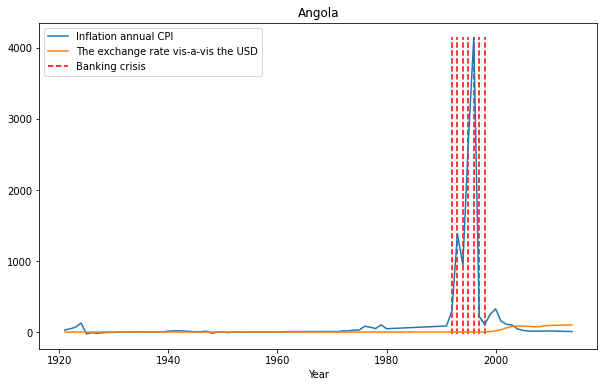

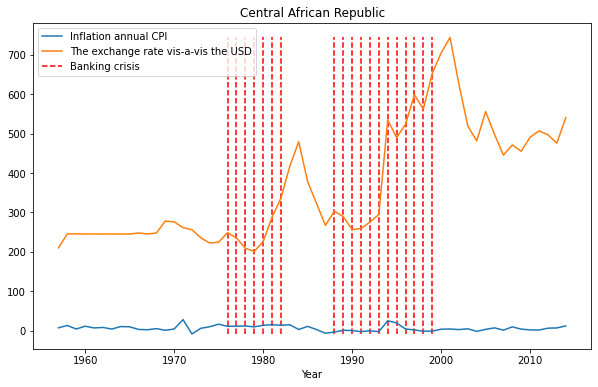

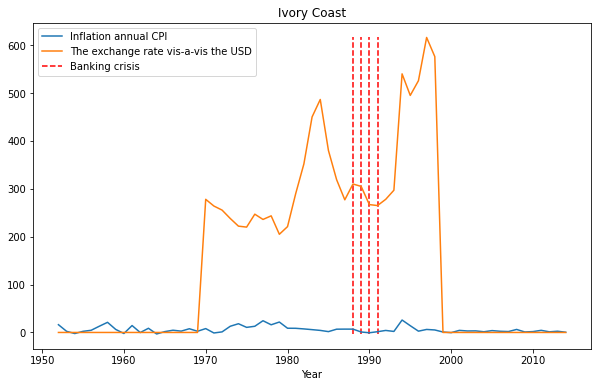

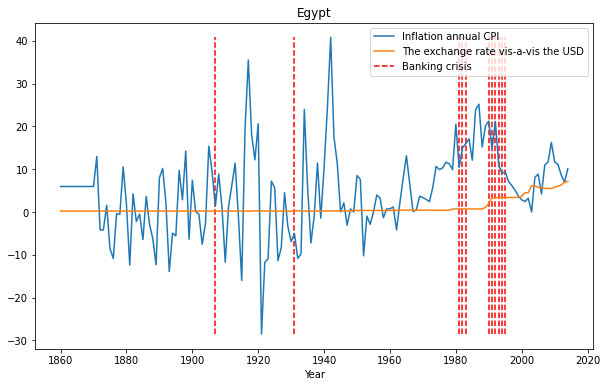

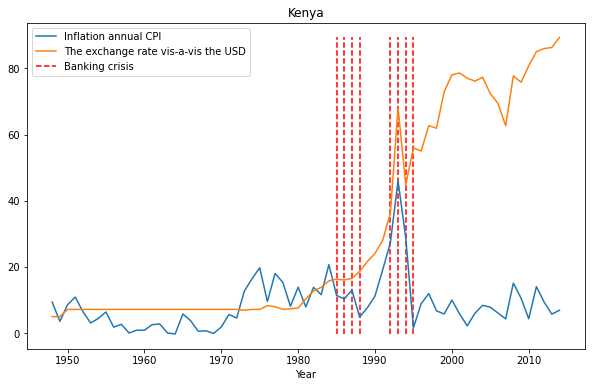

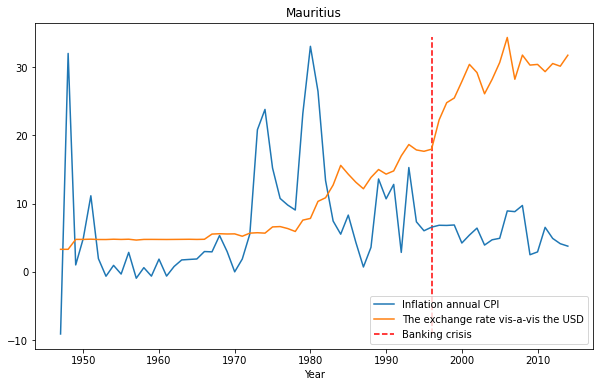

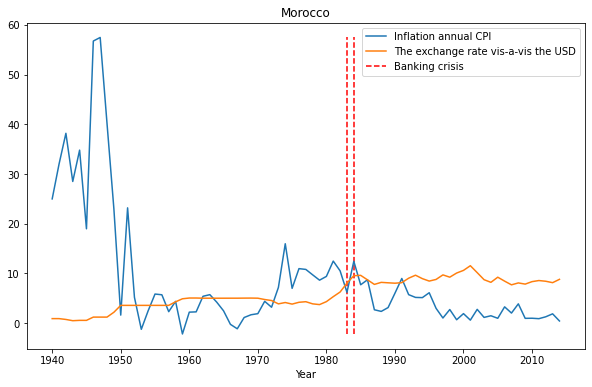

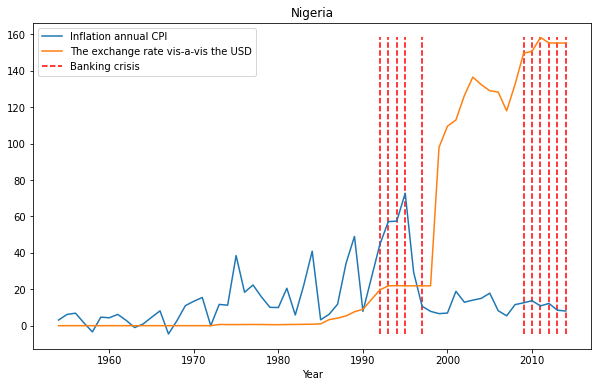

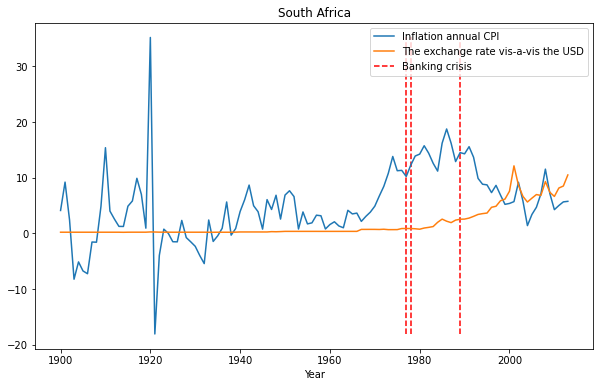

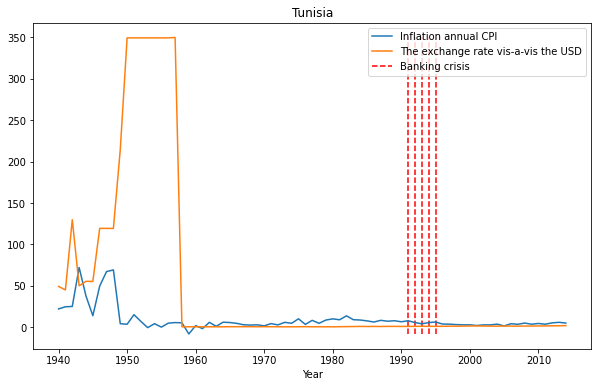

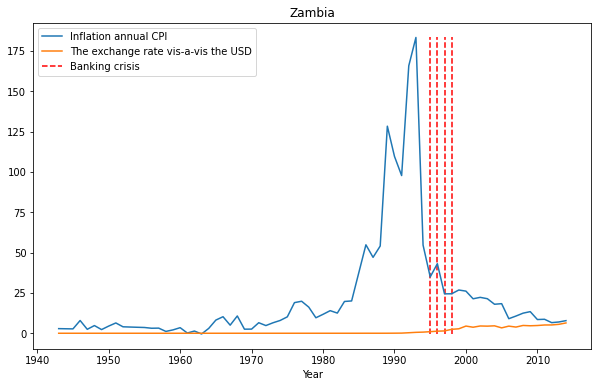

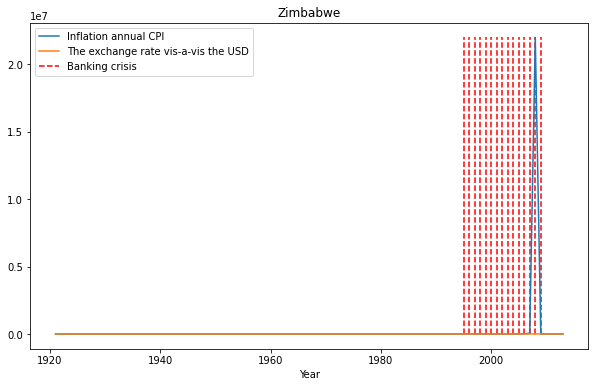

In [16]:
#Inflation annual CPI, the exchange rate of the country vis-a-vis the USD and the banking crisis all in one plot for every country
Countryplotall(df)

In [17]:
#Let's now identify the correlation of the variables banking crisis, the Inflation annual CPI and the exchange rate of the country vis-a-vis the USD
dfvariablesOfinterest=df[['inflation_annual_cpi','exch_usd','banking_crisis']]

In [18]:
#Compute the correlation
print(dfvariablesOfinterest.corr(method='spearman', min_periods=1))

                      inflation_annual_cpi  exch_usd  banking_crisis
inflation_annual_cpi              1.000000  0.154363        0.204626
exch_usd                          0.154363  1.000000        0.138324
banking_crisis                    0.204626  0.138324        1.000000


From the matrix above, it seems that the banking crisis has a weak linear correlation with the inflation annual CPI (i.e., 0.2) and a very weak linear correlation with the country's exchange rate vis-a-vis the USD (i.e., 0.14).

In [19]:
dfdemographics=pd.read_csv('life-expectancy-vs-gdp-per-capita.csv')

In [20]:
print(dfdemographics.columns)

Index(['Entity', 'Code', 'Year', 'Life expectancy', 'GDP per capita',
       '145446-annotations', 'Population (historical estimates)', 'Continent'],
      dtype='object')


In [21]:
dfwithyearcol = pd.read_csv ('african_crises.csv')

In [22]:
print(dfwithyearcol.columns)

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')


In [23]:
#We will use the dfdemographics to add a column to our dfwithyearcol dataframe with each country population
newlist=[]
for i in range(len(dfwithyearcol)):
  for j in range(len(dfdemographics)):
      if (dfwithyearcol['year'][i]==dfdemographics['Year'][j] and dfwithyearcol['country'][i]==dfdemographics['Entity'][j]):
          newlist.append([dfwithyearcol['year'][i],dfwithyearcol['country'][i],dfdemographics['Population (historical estimates)'][j],dfwithyearcol['cc3'][i],dfwithyearcol['inflation_annual_cpi'][i],dfwithyearcol['exch_usd'][i],dfwithyearcol['banking_crisis'][i],dfwithyearcol['independence'][i],dfwithyearcol['systemic_crisis'][i]])

In [24]:
#convert tyhe list of lists to dataframe
dfwithpop= pd.DataFrame(newlist,columns = ['year','country','Population (historical estimates)','cc3','inflation_annual_cpi','exch_usd','banking_crisis','independence','systemic_crisis'])

In [25]:
print(dfwithpop.head(5))

   year  country  ...  independence systemic_crisis
0  1870  Algeria  ...             0               1
1  1871  Algeria  ...             0               0
2  1872  Algeria  ...             0               0
3  1873  Algeria  ...             0               0
4  1874  Algeria  ...             0               0

[5 rows x 9 columns]


In [26]:
#keep only the needed variables
needed_variables=dfwithpop[['year','country','Population (historical estimates)','independence', 'banking_crisis','systemic_crisis','exch_usd','inflation_annual_cpi']]

In [89]:
def Countryplot(data):
  for j in data['country'].unique():
      datanew=data[data['country']==j]
      fig = px.line(datanew, x="year", y="Population (historical estimates)", title=j)  
      fig.show()

In [84]:
# evolution of population of each country
Countryplot(needed_variables)